In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# wrangle data
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats
import pandas_profiling

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

# my modules
import acquire
import summarize
import prepare
import env

In [2]:
df = acquire.get_zillow_data()
df.sample()

,county,tax_rate,id,parcelid,airconditioningtypeid,airconditioningdesc,architecturalstyletypeid,architecturalstyledesc,basementsqft,bathroomcnt,...,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,typeconstructiontypeid,typeconstructiondesc,censustractandblock,transactiondate,logerror,transactions
15644,Los Angeles,0.02,1067881,12833927,nan,None,nan,None,nan,1.00,...,"17,161.00",815.17,None,nan,nan,None,"60,374,086,311,016.00",2017-04-05,-0.00,1


In [3]:
df.shape

(52169, 72)

In [4]:
# pandas_profiling.ProfileReport(df)

In [5]:
df = prepare.handle_missing_values(df)

In [6]:
cols_to_remove = ["unitcnt", "propertyzoningdesc", "heatingorsystemdesc", 
                  "heatingorsystemtypeid", "buildingqualitytypeid", "assessmentyear",
                  "calculatedbathnbr", "finishedsquarefeet12", "propertylandusedesc", 
                  "propertylandusetypeid", "rawcensustractandblock" , "regionidcity",
                  "state", "id", "fullbathcnt", "roomcnt"]

In [7]:
df = prepare.remove_columns(df, cols_to_remove)

In [8]:
df.dropna(inplace=True)

In [9]:
cols = ["censustractandblock","county", "transactiondate",  "fips", "propertycountylandusecode", "parcelid", "regionidcounty", "regionidzip", "yearbuilt", "transactions"]

In [10]:
df = prepare.numeric_to_category(df, cols)

In [11]:
df_nums = df.select_dtypes(exclude="category")

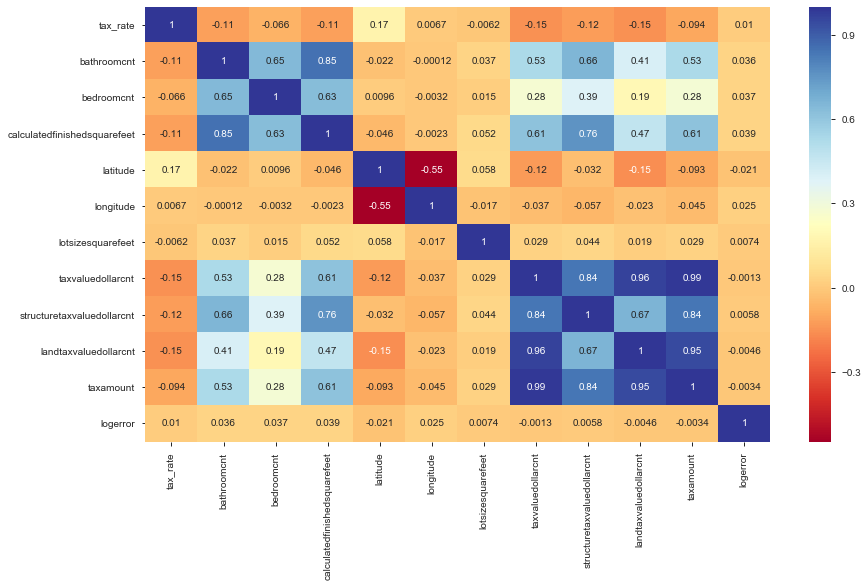

In [12]:
plt.figure(figsize=(14,8))
sns.heatmap(df_nums.corr(), cmap='RdYlBu', annot=True)

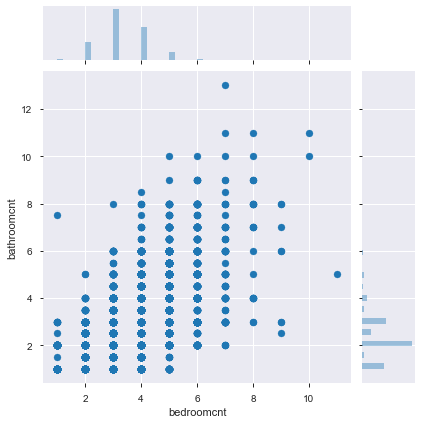

In [13]:
sns.jointplot(data=df, x="bedroomcnt", y="bathroomcnt")

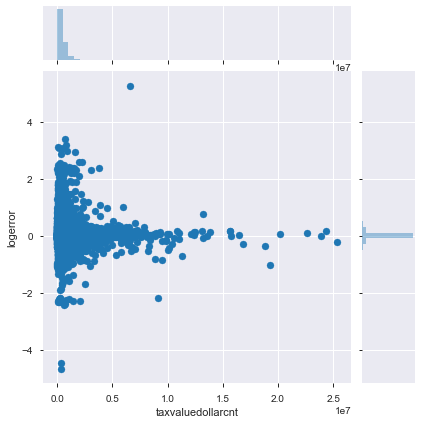

In [14]:
sns.jointplot(data=df, x="taxvaluedollarcnt" , y="logerror" )

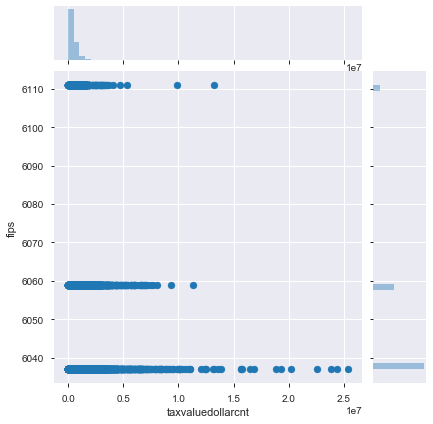

In [15]:
sns.jointplot(data=df, x="taxvaluedollarcnt" , y="fips" )

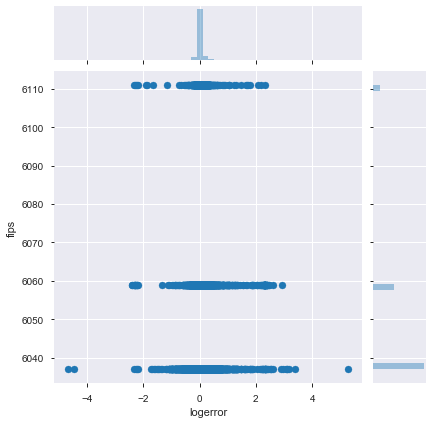

In [16]:
sns.jointplot(data=df, x="logerror" , y="fips" )

In [ ]:
sns.pairplot(df, hue="fips")

In [ ]:
plt.figure(figsize=(14,8))
sns.scatterplot(y="latitude", x="longitude", data=df, hue="county", size="taxvaluedollarcnt")
plt.legend()
